In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv
/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv


In [26]:
df = pd.read_csv("../input/gooogle-stock-price/Google_Stock_Price_Train.csv")
df_test = pd.read_csv("/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
train = df.loc[:,["Open"]].values
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

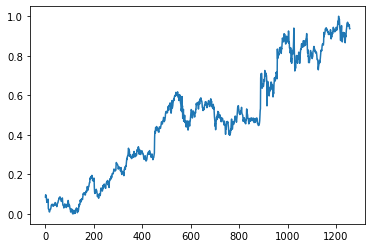

In [10]:
plt.plot(train_scaled)
plt.show()

In [12]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1208, 50, 1)

In [15]:
y_train = y_train.reshape(-1,1)
y_train.shape

(1208, 1)

In [20]:
regressor = Sequential()

regressor.add(SimpleRNN(45,return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.15))

regressor.add(SimpleRNN(45,return_sequences = True))
regressor.add(Dropout(0.15))

regressor.add(SimpleRNN(45,return_sequences = True))
regressor.add(Dropout(0.15))

regressor.add(SimpleRNN(units = 45))
regressor.add(Dropout(0.15))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
38/38 [==============================] - 2s 40ms/step - loss: 0.2895
Epoch 2/30
38/38 [==============================] - 1s 39ms/step - loss: 0.1911
Epoch 3/30
38/38 [==============================] - 2s 42ms/step - loss: 0.1498
Epoch 4/30
38/38 [==============================] - 2s 40ms/step - loss: 0.1196
Epoch 5/30
38/38 [==============================] - 1s 39ms/step - loss: 0.0901
Epoch 6/30
38/38 [==============================] - 1s 39ms/step - loss: 0.0724
Epoch 7/30
38/38 [==============================] - 1s 38ms/step - loss: 0.0585
Epoch 8/30
38/38 [==============================] - 1s 38ms/step - loss: 0.0511
Epoch 9/30
38/38 [==============================] - 1s 37ms/step - loss: 0.0430
Epoch 10/30
38/38 [==============================] - 1s 37ms/step - loss: 0.0378
Epoch 11/30
38/38 [==============================] - 2s 40ms/step - loss: 0.0388
Epoch 12/30
38/38 [==============================] - 1s 39ms/step - loss: 0.0302
Epoch 13/30
38/38 [==================

In [41]:
real_values = df_test.loc[:,["Open"]].values
dataset_total = pd.concat((df["Open"], df_test["Open"]),axis = 0)
inputs = dataset_total[len(df)-len(df_test)- timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs.shape

(90, 1)

In [43]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

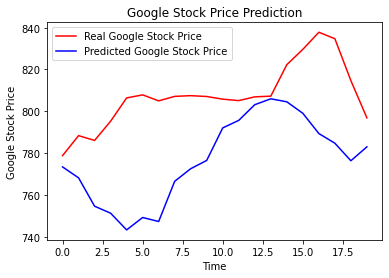

In [45]:
plt.plot(real_values, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()